In [1]:
%matplotlib inline

In [2]:
import os
from astropy.table import Table
from halotools.sim_manager import CachedHaloCatalog
from halotools.utils import crossmatch
from halotools.utils import sliding_conditional_percentile
from time import time
import matplotlib.cm as cm

drn = "/Users/aphearin/work/DATA/diffprof_data"
t_bpl = np.load("/Users/aphearin/work/DATA/diffmah_data/PUBLISHED_DATA/bpl_cosmic_time.npy")
bpl = Table.read(os.path.join(drn, "BPL_halo_table.hdf5"))
bpl_raw = np.load(os.path.join(drn, "bpl_cens_trunks_conc.npy"))
assert np.allclose(bpl['halo_id'], bpl_raw['halo_id'])
bpl['conch_sim'] = bpl_raw['conc']
del bpl_raw
print(bpl.keys())

['halo_id', 'conc_beta_early', 'conc_beta_late', 'conc_k', 'conc_lgtc', 'u_conc_beta_early', 'u_conc_beta_late', 'u_conc_k', 'u_conc_lgtc', 'logmp', 'mah_early', 'mah_late', 'mah_logtc', 'mah_k', 'log_mah_fit', 'conch_fit', 'tform_50', 'p_tform_50', 'conch_sim']


In [3]:
lgm0 = 12

mmsk = np.abs(bpl['logmp'] - lgm0) < 0.1
sample = bpl[mmsk]

TARR = np.linspace(1, 13.8, 500)
LGTARR = np.log10(TARR)
LGM_MIN_BPL = 10.5


tc = nan
c_min = nan
c_late = nan


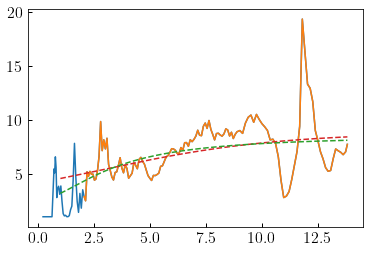

In [9]:
from scipy.optimize import curve_fit

from diffprof.fit_nfw_helpers_lintime import get_loss_data, fit_lgconc
from diffprof.nfw_evolution_lintime import lgc_vs_t, DEFAULT_CONC_PARAMS

from diffprof.fit_nfw_helpers_fixed_k import get_loss_data as get_loss_data_lgt, fit_lgconc as fit_lgconc_lgt
from diffprof.nfw_evolution import lgc_vs_lgt

P_DEFAULT = np.array(list(DEFAULT_CONC_PARAMS.values()))

ih = np.random.randint(0, len(sample))
p_guess = fit_lgconc(t_bpl, sample['conch_sim'][ih, :], sample['log_mah_fit'][ih, :], LGM_MIN_BPL)[0]
p_best, loss, method, loss_data = fit_lgconc(
    t_bpl, sample['conch_sim'][ih, :], sample['log_mah_fit'][ih, :], LGM_MIN_BPL, p0=np.array(p_guess))
xdata, ydata, msk = loss_data

p_best_lgt, loss_lgt, method_lgt, loss_data_lgt = fit_lgconc_lgt(
    t_bpl, sample['conch_sim'][ih, :], sample['log_mah_fit'][ih, :], LGM_MIN_BPL)
xdata_lgt, ydata_lgt, msk_lgt = loss_data_lgt

fig, ax = plt.subplots(1, 1)

__=ax.plot(t_bpl, sample['conch_sim'][ih, :])
__=ax.plot(xdata, 10**ydata)

__=ax.plot(TARR, 10**lgc_vs_t(TARR, *p_guess), '--', color=mred)
__=ax.plot(TARR, 10**lgc_vs_t(TARR, *p_best), '--', color=mblue)
__=ax.plot(TARR, 10**lgc_vs_lgt(LGTARR, *p_best_lgt), '--', color=mgreen)

tc_best, lgc_min, lgc_late = p_best
print("tc = {}".format(tc_best))
print("c_min = {}".format(10**lgc_min))
print("c_late = {}".format(10**lgc_late))

In [5]:
p_guess

DeviceArray([0.7624159, 0.3045533, 1.2631224], dtype=float32)

In [6]:
p_best

Buffer([0.76241505, 0.30455264, 1.2631218 ], dtype=float32)